In [1]:
data = []


with open('events.txt', 'r') as f:
    for line in f:
        timestamp, x, y, polarity = line.split()
        data.append((float(timestamp), int(x), int(y), int(polarity)))
        if float(timestamp) > 1:
            break

In [2]:
timestamps = [d[0] for d in data]
x = [d[1] for d in data]
y = [d[2] for d in data]
polarity = [d[3] for d in data]

print("max x: ", max(x))
print("min x: ", min(x))
print("max y: ", max(y))
print("min y: ", min(y))
print("events: ", len(data))


max x:  239
min x:  4
max y:  179
min y:  1
events:  72047


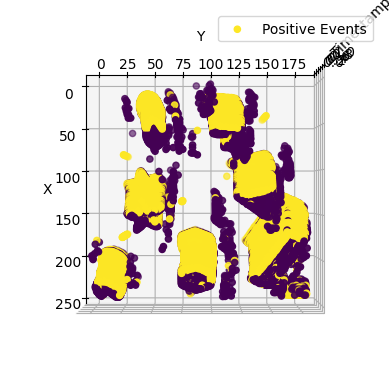

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y , timestamps, c=polarity, label='Positive Events')

# Plot negative events


# Set labels for each dimension
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Timestamp')
ax.view_init(90, 0)
# Add a legend
ax.legend()

# Show the chart
plt.show()


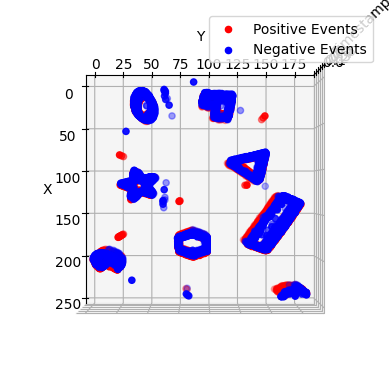

In [4]:
# 13.2 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Separate positive and negative events for the first 8000 events
positive_events = [(x, y, t, p) for (t, x, y, p) in data[:8000] if p == 1]
negative_events = [(x, y, t, p) for (t, x, y, p) in data[:8000] if p == 0]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot positive events
ax.scatter([x for (x, y, t, _) in positive_events], [y for (x, y, t, _) in positive_events], [t for (x, y, t, _) in positive_events], c='r', label='Positive Events')

# Plot negative events
ax.scatter([x for (x, y, t, _) in negative_events], [y for (x, y, t, _) in negative_events], [t for (x, y, t, _) in negative_events], c='b', label='Negative Events')

# Set labels for each dimension
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Timestamp')

# Add a legend
ax.legend()

# Rotate the chart for better visualization
ax.view_init(elev=90, azim=0)

# Show the chart
plt.show()


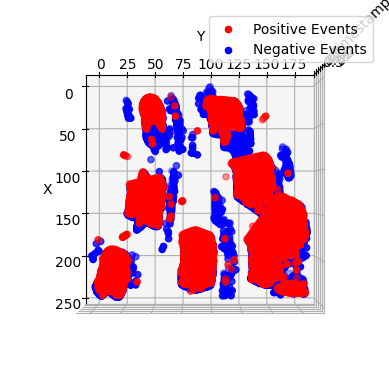

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Separate positive and negative events for the specified timestamp range
positive_events = [(x, y, t, p) for (t, x, y, p) in data if 0.5 <= t <= 1 and p == 1]
negative_events = [(x, y, t, p) for (t, x, y, p) in data if 0.5 <= t <= 1 and p == 0]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot positive events
ax.scatter([x for (x, y, t, _) in positive_events], [y for (x, y, t, _) in positive_events], [t for (x, y, t, _) in positive_events], c='r', label='Positive Events')

# Plot negative events
ax.scatter([x for (x, y, t, _) in negative_events], [y for (x, y, t, _) in negative_events], [t for (x, y, t, _) in negative_events], c='b', label='Negative Events')

# Set labels for each dimension
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Timestamp')

# Add a legend
ax.legend()

# Rotate the chart for better visualization
ax.view_init(90, 0)

# Show the chart
plt.show()


In [7]:
import numpy as np
import cv2
img = cv2.imread('images/frame_00000000.png', cv2.IMREAD_GRAYSCALE)
image_shape = img.shape

def event_frame(x, y, polarity, image_shape):
    image_copy  = np.ones(image_shape).astype(np.uint8) * 128

    for i in range(len(x)):
        if polarity[i] == 1:
            image_copy[int(y[i]), int(x[i])] = 255
        else:
            image_copy[int(y[i]), int(x[i])] = 0
    return image_copy

tau = 0.01

# Initialize temporary lists
temp_timestamps = []
temp_x = []
temp_y = []
temp_polarity = []

# Iterate through all saved events
for i in range(len(data)):
    # Append event data to temporary lists
    temp_timestamps.append(data[i][0])
    temp_x.append(data[i][1])
    temp_y.append(data[i][2])
    temp_polarity.append(data[i][3])
    
    # Check if the difference between the first and last timestamp is greater than tau
    if temp_timestamps[-1] - temp_timestamps[0] > tau:
        # Call the function with the aggregated event data
        image = event_frame(temp_x, temp_y, temp_polarity, image_shape)
        
        # Show image with OpenCV functions
        cv2.imshow('Aggregated Events', image)
        cv2.waitKey(100)
        
        # Clear temporary lists for the next aggregation
        temp_timestamps.clear()
        temp_x.clear()
        temp_y.clear()
        temp_polarity.clear()

cv2.destroyAllWindows()
